In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
#set up the ability to query a SQLite database. 
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
#Reflect: Transfer the contents of the database into a different structure of data
# reflect an existing database into a new model
Base = automap_base()
#Reflect the schema of our SQLite tables into our code and create mappings.
# When we reflect tables we create classes to keep our code separate.
# This ensures that if any other classes or systems want to interact with it, 
# they can interact with only specific subsets of data instead of the whole dataset. 
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
#SQLite uses CLASSES instead of TABLES
#Base.classes: Access to all classes
#keys(): references all the names of the classes
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# To reference each class we use Base.classes.<class name>
# So that we don't have to type Base.classes each time, we create a variable to the class
# MEASUREMENT AND STATION reference the classes in the database
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [25]:
results = []
results = session.query(Measurement).all()
print(results)


[<sqlalchemy.ext.automap.measurement object at 0x000002ACD14ECF48>, <sqlalchemy.ext.automap.measurement object at 0x000002ACD1AEAF48>, <sqlalchemy.ext.automap.measurement object at 0x000002ACD1AEADC8>, <sqlalchemy.ext.automap.measurement object at 0x000002ACD1AEAC88>, <sqlalchemy.ext.automap.measurement object at 0x000002ACD1AEAB48>, <sqlalchemy.ext.automap.measurement object at 0x000002ACD1AEAA08>, <sqlalchemy.ext.automap.measurement object at 0x000002ACD1AEA908>, <sqlalchemy.ext.automap.measurement object at 0x000002ACD1AEA808>, <sqlalchemy.ext.automap.measurement object at 0x000002ACD1AEA6C8>, <sqlalchemy.ext.automap.measurement object at 0x000002ACD1AEA608>, <sqlalchemy.ext.automap.measurement object at 0x000002ACD1AEA508>, <sqlalchemy.ext.automap.measurement object at 0x000002ACD1AEA3C8>, <sqlalchemy.ext.automap.measurement object at 0x000002ACD1AEA2C8>, <sqlalchemy.ext.automap.measurement object at 0x000002ACD1AEA188>, <sqlalchemy.ext.automap.measurement object at 0x000002ACD1A86

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
#Our starting date is 2017, 8, 23 (yyyy,mm,dd) and we want to go back 1 year
# timedelta specified number of days to subtract from starting date
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days= 365) 

#variable to store the results of the query
results = []

# Perform a query to retrieve the data and precipitation scores
# SESSION.QUERY() is how each query is started. 
# Use BASE CLASS REFERENCES the class reference is capitalized
#.date, .prcp refers to the data columns
#FILTER the data for the previous year using the variable prev_year
#.all() function returns all of the results and puts them in a list
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
#PRINT all records retrieved in the query
#print(results) ## formatting has not been added 

# Save the query results as a Pandas DataFrame and set the index to the date column
#CREATE dataframe result (variable that stores our results) columns (defines the column names for dataframe)
#The variable 'inplace' is used to specify whether or not to create a new dataframe
# inplace = true () do NOT want to create new DF, false() DO want to create new DF
#Setting the index to 'date' will remove row numbers and make 

df = pd.DataFrame(results, columns = ['date','precipitation'])
#df.set_index(df['date'], inplace=True)
#PRINT WITH index
#print(df)

# NOTE with set_index, two date columns are present therefore, we are printing without index 
#reset for plotting
df.set_index(df['date'], inplace=True)

# Print WITHOUT date index
#print(df)

# SORT the dataframe by date USING sort_index() function
# NOTE: remember to sort data that will be plotted
df= df.sort_index()
print(df.to_string(index=False))




      date  precipitation
2016-08-23           0.00
2016-08-23            NaN
2016-08-23           1.79
2016-08-23           0.05
2016-08-23           0.15
2016-08-23           0.70
2016-08-23           0.02
2016-08-24           0.08
2016-08-24           2.15
2016-08-24           2.28
2016-08-24            NaN
2016-08-24           1.45
2016-08-24           1.22
2016-08-24           2.15
2016-08-25           0.08
2016-08-25           0.00
2016-08-25           0.21
2016-08-25           0.06
2016-08-25           0.00
2016-08-25           0.11
2016-08-25           0.08
2016-08-26           0.03
2016-08-26           0.01
2016-08-26           0.00
2016-08-26           0.04
2016-08-26           0.02
2016-08-26           0.00
2016-08-27           0.18
2016-08-27           0.12
2016-08-27           0.00
2016-08-27           0.00
2016-08-27           0.02
2016-08-27            NaN
2016-08-28           0.60
2016-08-28           0.14
2016-08-28           0.01
2016-08-28           0.14
2016-08-28  

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(-500.0, 0, '2017-05-27'),
  Text(0.0, 0, '2016-08-23'),
  Text(500.0, 0, '2016-11-09'),
  Text(1000.0, 0, '2017-01-28'),
  Text(1500.0, 0, '2017-04-18'),
  Text(2000.0, 0, '2017-07-10'),
  Text(2500.0, 0, '')])

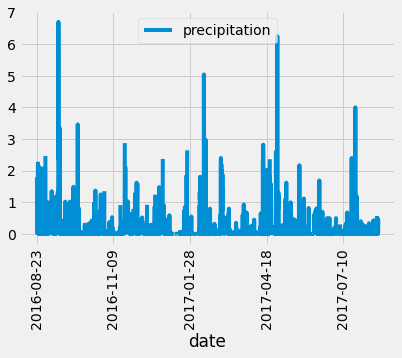

In [12]:
#PLOT WITH MATPLOTLIB
# Use Pandas Plotting with Matplotlib to plot the data

df.plot()
#SLZ: need code to 'turn the dates around vertically'
plt.xticks(rotation=90)


In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
# How many stations are available in this dataset?
#func.count() counts the dataset
#Station = class, station = column
session.query(func.count(Station.station)).all()

[(9,)]

In [15]:
# What are the most active stations? slz: which stations have the most precipitation recordings
# List the stations and the counts in descending order.
# Use group_by() to provide a count for each station
#order_by order results in descending order
session.query(Measurement.station,func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()


#result - 9 stations with the number of precipitation recordings per station (stationID,count)

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
#MIN,MAX,AVERAGE temperatures
#NOTE: tobs is a column in the data. guessing it is the temperatures
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()



[(54.0, 85.0, 71.66378066378067)]

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


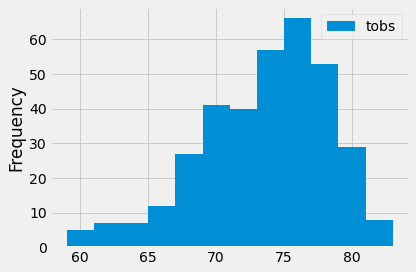

In [17]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
#print(results) prints a LIST

#CONVERT FROM LIST TO DATAFRAME
df = pd.DataFrame(results, columns=['tobs'])
print(df)

#plot as a HISTOGRAM (graph made up of a range of data that is separated into different bins)
# Determin how many bins (5-20). Only need to specify number of bins not the ranges
# use PLOT() AND HIST ()
df.plot.hist(bins=12)

#PLT.TIGHT_LAYOUT() x=axis labels so they fit into box holding plot
plt.tight_layout()

In [18]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge